<a href="https://colab.research.google.com/github/saichandrareddy1/7claasifieragorithsontheleafdata/blob/master/Gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('gold.csv')
data.head()

,Date,USD,EUR,GBP,JPY,Unnamed: 5
0,31-12-1969,35.20,22.24135,14.66239,12592.43816,NaN
1,30-1-1970,34.99,23.19885,14.53677,12496.35219,NaN
2,27-2-1970,35.02,23.26143,14.54923,12529.95188,NaN
3,31-3-1970,35.30,23.42317,14.67166,12627.64624,NaN
4,30-4-1970,35.85,23.78739,14.92507,12858.35769,NaN


In [0]:
data2 = data.drop(['EUR','GBP','JPY','Unnamed: 5'], axis = 1)

In [0]:
data1 = data2.dropna()
data1.isnull().any()
data = data.fillna(lambda x: x.median())

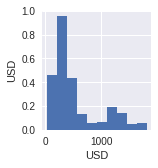

In [5]:
sns.pairplot(data1)

In [0]:
dt = data1['Date'].values

In [7]:
data1['Date'] = pd.to_datetime(data1['Date']).astype(int)
data1.head()

,Date,USD
0,-86400000000000,35.20
1,2505600000000000,34.99
2,4924800000000000,35.02
3,7689600000000000,35.30
4,10281600000000000,35.85


In [0]:
#data1['Date'].values

In [9]:
data1.dtypes

Date      int64
USD     float64
dtype: object

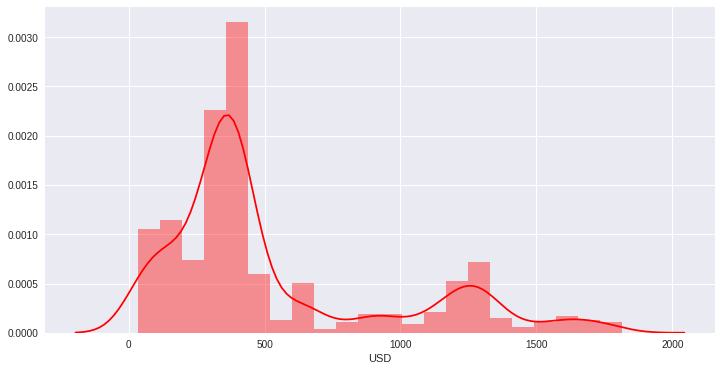

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.distplot(data1['USD'], color='red',hist=True,rug=False)

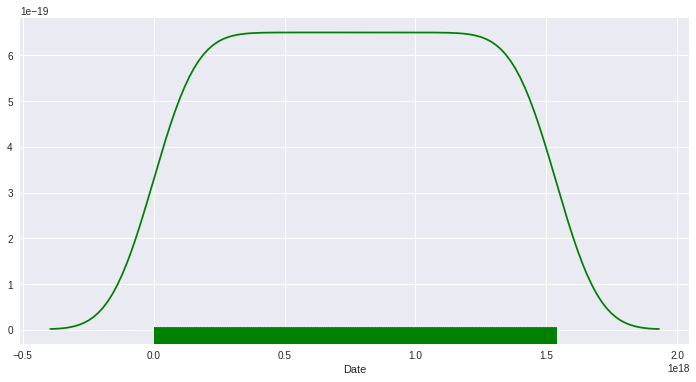

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(data1['Date'],color='green',hist=False,rug=True)

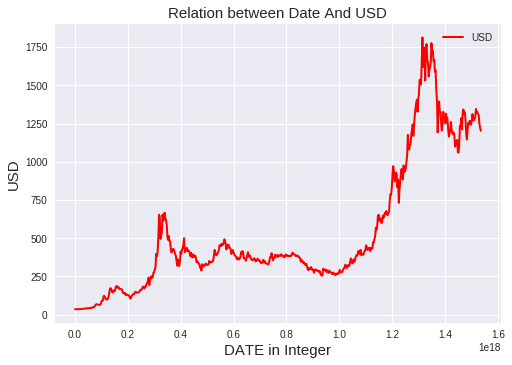

In [37]:
plt.plot(data1['Date'],data1['USD'],color = 'r',lw = 2,label="USD")
plt.xlabel('DATE in Integer', fontsize = 15)
plt.ylabel('USD', fontsize =15)
plt.title('Relation between Date And USD', fontsize =15)
plt.legend()
plt.show()

In [13]:
Date = np.array(data1.Date)
USD = np.array(data1.USD)
data1.shape

(585, 2)

In [0]:
X = Date.reshape(Date.shape[0],1).astype(int)


In [0]:
y = USD.reshape(Date.shape[0],1)

No handles with labels found to put in legend.


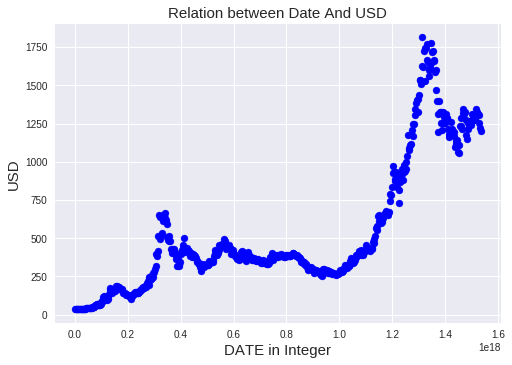

In [38]:
plt.scatter(X,y,color='blue')
plt.xlabel('DATE in Integer', fontsize = 15)
plt.ylabel('USD', fontsize = 15)
plt.title('Relation between Date And USD', fontsize =15)
plt.legend()
plt.show()

In [17]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.6,random_state = 0)


In [19]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

No handles with labels found to put in legend.


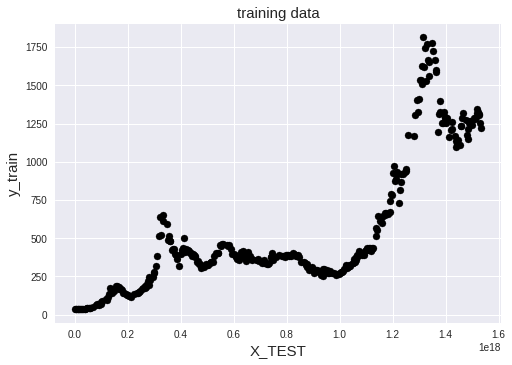

In [42]:
plt.scatter(X_test,y_test,color='k')
plt.xlabel('X_TEST', fontsize = 15)
plt.ylabel('y_train', fontsize = 15)
plt.title('training data', fontsize =15)
plt.legend()
plt.show()

In [0]:
y_pred = reg.predict(X_test)

No handles with labels found to put in legend.


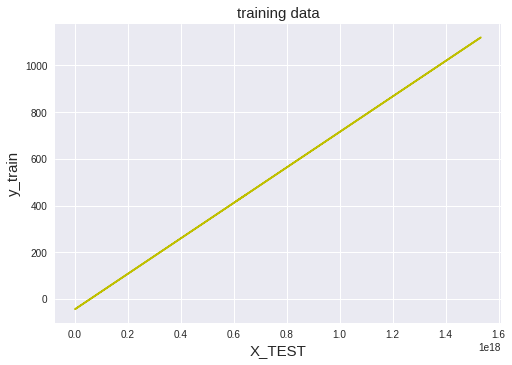

In [45]:
plt.plot(X_test,y_pred,color='y')
plt.xlabel('X_TEST', fontsize = 15)
plt.ylabel('y_train', fontsize = 15)
plt.title('training data', fontsize =15)
plt.legend()
plt.show()

No handles with labels found to put in legend.


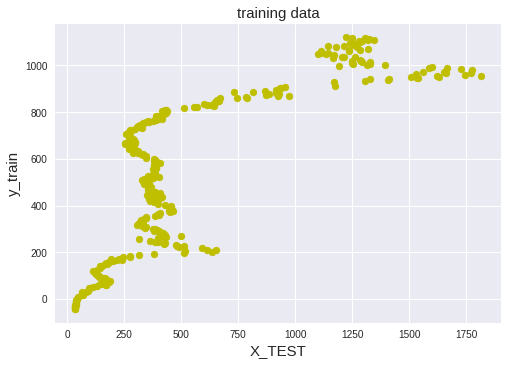

In [47]:
plt.scatter(y_test,y_pred,color='y')
plt.xlabel('X_TEST', fontsize = 15)
plt.ylabel('y_train', fontsize = 15)
plt.title('training data', fontsize =15)
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
try:
  print('R-squared score (training): {}'.format(reg.score(X_train, y_train)))
  print('R-squared score (test): {}'.format(reg.score(X_test, y_test)))
  print("mean absolute error:-",mean_absolute_error(y_test, y_pred)/1000)
  print("mean square error:-",mean_squared_error(y_test, y_pred)/100000)
  print("r2 error :-",r2_score(y_test, y_pred, multioutput='variance_weighted'))
except Exception:
  pass

R-squared score (training): 0.6508798512497826
R-squared score (test): 0.625782613100968
mean absolute error:- 0.20175258535244806
mean square error:- 0.7044278806008631
r2 error :- 0.625782613100968
